# Analisis Data Bike Sharing

- Nama: Muhammad Jabir Habibie Batubara
- Email: muhammadjabirhabibie@gmail.com

## Menentukan Pertanyaan Bisnis

-  Berapa persentase peningkatan atau penurunan penyewaan sepeda selama hari libur dibandingkan dengan hari biasa?
- Bagaimana cuaca mempengaruhi keputusan untuk menyewa sepeda? Apakah kondisi cuaca yang lebih baik meningkatkan penyewaan secara signifikan?

# Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data


### Memuat Tabel day

In [28]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Asessing Data


### Menilai Data Day_df


In [21]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Memeriksa Duplikasi dan Menampilkan RIngkasan Parameter

In [40]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Cleaning data

### Mencari Missing Value

In [ ]:
day_df.isna().sum() 

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Mengecek Tipe Data


In [42]:
day_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## Exploratory Data Analysis (EDA)

### Explore Data Day

-  Berapa persentase peningkatan atau penurunan penyewaan sepeda selama hari libur dibandingkan dengan hari biasa?

In [77]:
holiday_data = day_df[day_df['holiday'] == 1]
non_holiday_data = day_df[day_df['holiday'] == 0]
average_holiday_rentals = holiday_data['cnt'].mean()
average_non_holiday_rentals = non_holiday_data['cnt'].mean()

percentage_change = ((average_holiday_rentals - average_non_holiday_rentals) / average_non_holiday_rentals) * 100

average_holiday_rentals, average_non_holiday_rentals, percentage_change


(np.float64(3735.0),
 np.float64(4527.104225352113),
 np.float64(-17.49692929348239))

- Bagaimana cuaca mempengaruhi keputusan untuk menyewa sepeda? Apakah kondisi cuaca yang lebih baik meningkatkan penyewaan secara signifikan?

In [85]:
avg_cnt_by_weather = day_df.groupby('weathersit')['cnt'].mean()
avg_cnt_by_weather


weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64

## Visualization & Explanatory Analysis

-  Berapa persentase peningkatan atau penurunan penyewaan sepeda selama hari libur dibandingkan dengan hari biasa?

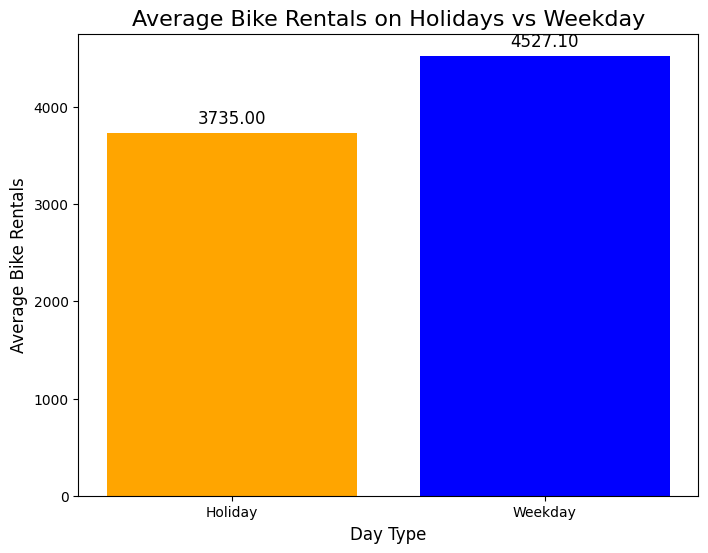

In [80]:
labels = ['Holiday', 'Weekday']
averages = [average_holiday_rentals, average_non_holiday_rentals]

plt.figure(figsize=(8, 6))
plt.bar(labels, averages, color=['orange', 'blue'])

plt.title('Average Bike Rentals on Holidays vs Weekday', fontsize=16)
plt.ylabel('Average Bike Rentals', fontsize=12)
plt.xlabel('Day Type', fontsize=12)

for i, avg in enumerate(averages):
    plt.text(i, avg + 100, f'{avg:.2f}', ha='center', fontsize=12)

plt.show()


- Bagaimana cuaca mempengaruhi keputusan untuk menyewa sepeda? Apakah kondisi cuaca yang lebih baik meningkatkan penyewaan secara signifikan?

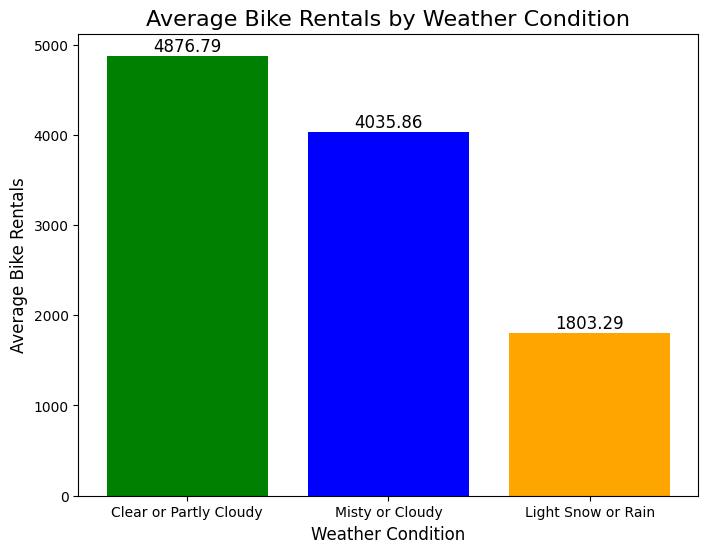

In [86]:
weather_conditions = {
    1: 'Clear or Partly Cloudy',
    2: 'Misty or Cloudy',
    3: 'Light Snow or Rain',
    4: 'Heavy Rain or Storm'
}

avg_cnt_by_weather.index = avg_cnt_by_weather.index.map(weather_conditions)

plt.figure(figsize=(8, 6))
plt.bar(avg_cnt_by_weather.index, avg_cnt_by_weather.values, color=['green', 'blue', 'orange', 'red'])

plt.title('Average Bike Rentals by Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Average Bike Rentals', fontsize=12)

for i, value in enumerate(avg_cnt_by_weather.values):
    plt.text(i, value + 50, f'{value:.2f}', ha='center', fontsize=12)

plt.show()


In [87]:
day_df.to_csv("dashboard/all_data.csv", index=False)